# Dimensionality reduction and Feature Selection


We first import three useful libraries
1. numpy (matrix algebra):  we use np as a shortcut
2. plyplot from matplotlib: useful for plotting charts: we use plt as a shortcut
3. sklearn
3. use tab and shift+tab for help

In [85]:
import numpy as np
import matplotlib.pyplot as plt

In [86]:
# this line plots graphs in line
%matplotlib inline

# Pearson correlation

In [87]:
from scipy.stats import pearsonr

In [88]:
# example 1
pearsonr([1,2,3],[1,2,3.1])

(0.99962228516121843, 0.017498096813278487)

In [89]:
#example 2
pearsonr([1,2,3,4,5,6],[2,4,10,8,10,12])

(0.90886906843896254, 0.012078855823236475)

In [90]:
#example 3
pearsonr([1,2,3,4,5,6],[6,5,4,3,2,1])

(-1.0, 0.0)

In [91]:
#example 3
pearsonr([1,2,3,4,5,6],[1,2,3,3,2,1])

(0.0, 1.0)

## Generating features that are linearly related

Pearson Coefficient =  (0.97827693247634484, 8.7451296188086333e-69)


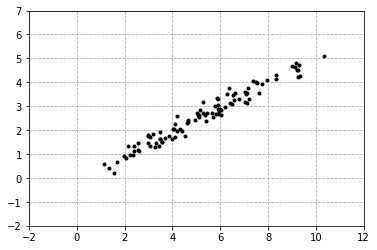

In [92]:
# we first produce some data whose scatter plot 
# exhibits a linear relationship
# y = mx + c or y = x
N=100
y_sigma=0.25   # variance for y feature
x_sigma=np.sqrt(5.0)   # variance for X feature
#x = (np.random.rand(N)-0.5)*10
x = np.random.randn(N)*x_sigma+5   #Gaussian and shift
#x = np.arange(0,10,.02)
N=len(x)
y = np.copy(x)/2.0+np.random.randn(N)*y_sigma # line equation + gaussian noise
print 'Pearson Coefficient = ',pearsonr(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-2,12))
ax.set_ylim((-2,7))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

## generating features that are non-linearly related

Pearson Coefficient =  (-0.12710341900375532, 0.0018112522281148403)


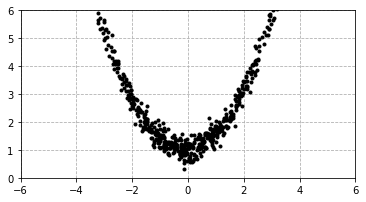

In [93]:
# we first produce some data whose scatter plot lies on a curve
# for example y = 0.5x^2 + 0.1x + 1.0
N=600
y_sigma=0.25
x = np.random.randn(N)*x_sigma
N=len(x)
#
y = (0.5*np.square(x) + 0.1*x + 1.) + np.random.randn(N)*y_sigma
#
print 'Pearson Coefficient = ',pearsonr(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-6,6))
ax.set_ylim((0,6))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

# Entropy

In [94]:
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

In [95]:
# skip this during lab session (useful for projects)
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

def calc_MI(x, y, bins):
    prob_xy = np.histogram2d(x, y, bins)
    c_xy=prob_xy[0]
    Hx = np.histogram(x,bins=prob_xy[1])
    Hy = np.histogram(y,bins=prob_xy[2])
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi,Hx

calc_MI(x,y,10)

(0.86573013960942458,
 (array([  7,  16,  41,  80, 130, 144, 103,  51,  19,   9]),
  array([-6.81138294, -5.52735062, -4.2433183 , -2.95928598, -1.67525366,
         -0.39122134,  0.89281098,  2.1768433 ,  3.46087562,  4.74490794,
          6.02894026])))

In [96]:
# generate dataset with sklearn built in functions
# optional exercise at home

# Mutual Information

### Compute P(X), H(X)
### Compute P(Y), H(y)
### Compute P(X,Y)

In [97]:
#assume x,y
print 'N =',N
D=np.int(np.sqrt(N/5.0))
print 'D =',D
D=10

N = 600
D = 10


[  8  17  42  81 131 145 104  52  20  10]
1.0
[ 0.01311475  0.02786885  0.06885246  0.13278689  0.2147541   0.23770492
  0.1704918   0.0852459   0.03278689  0.01639344]


<Container object of 10 artists>

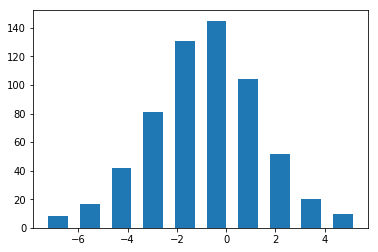

In [98]:
# find probability distribution for x
fc,bn=np.histogram(x, bins=D)
fc+=1 # Laplace's smoothing
print fc
P_x = fc/np.float((fc.sum()))
print np.sum(P_x)
print P_x

plt.bar(bn[:-1],fc)

[361 118  57  29  15  11   7   5   5   2]
1.0
[ 0.59180328  0.19344262  0.09344262  0.04754098  0.02459016  0.01803279
  0.01147541  0.00819672  0.00819672  0.00327869]


<Container object of 10 artists>

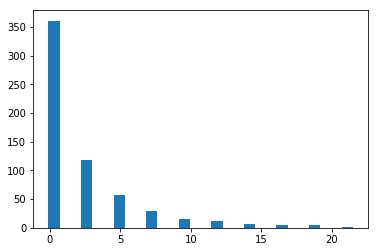

In [99]:
# find probability distribution for y
fc,bn=np.histogram(y, bins=D)
fc+=1 # Laplace's smoothing
print fc
P_y = fc/np.float((fc.sum()))
print np.sum(P_y)
print P_y
plt.bar(bn[:-1],fc)

In [100]:
# compute entropy for x and y
H_x = entropy(P_x,base=2)
print 'H_x=',H_x
H_y = entropy(P_y, base=2)
print 'H_y=', H_y


H_x= 2.8446593334
H_y= 1.88538740566


In [101]:
#
# Computer joint distribution for x and y; P_xy
#hist_xy=np.histogram2d(x, y, bins=[D,D])
#P_xy = hist_xy[0] / np.float(hist_xy[0].sum())
fc,bn1,bn2=np.histogram2d(x, y, bins=[D,D])
#add laplace smoothing
fc+=1
P_xy = fc / np.float(fc.sum())

print P_xy
#print P_xy[2,:]
#print np.sum(P_xy,axis=0)
#print P_xy[3,2]


[[ 0.00142857  0.00142857  0.00142857  0.00142857  0.00142857  0.00142857
   0.00142857  0.00571429  0.00571429  0.00285714]
 [ 0.00142857  0.00142857  0.00142857  0.00142857  0.01285714  0.01
   0.00428571  0.00142857  0.00142857  0.00142857]
 [ 0.00142857  0.00142857  0.03571429  0.02428571  0.00285714  0.00142857
   0.00142857  0.00142857  0.00142857  0.00142857]
 [ 0.02714286  0.08428571  0.00714286  0.00142857  0.00142857  0.00142857
   0.00142857  0.00142857  0.00142857  0.00142857]
 [ 0.18714286  0.00142857  0.00142857  0.00142857  0.00142857  0.00142857
   0.00142857  0.00142857  0.00142857  0.00142857]
 [ 0.20714286  0.00142857  0.00142857  0.00142857  0.00142857  0.00142857
   0.00142857  0.00142857  0.00142857  0.00142857]
 [ 0.09857143  0.05142857  0.00142857  0.00142857  0.00142857  0.00142857
   0.00142857  0.00142857  0.00142857  0.00142857]
 [ 0.00142857  0.03571429  0.04        0.00142857  0.00142857  0.00142857
   0.00142857  0.00142857  0.00142857  0.00142857]
 [ 0.0

In [102]:
# Compute Mutual Information and normalise
m=D
n=D
I_xy=0.0
for i in range(m):
    for j in range(n):
        I_xy += P_xy[i,j] * np.log2(P_xy[i,j] / (P_x[i]*P_y[j]))
print 'I_xy = ', I_xy
# we now normalize the mutual information
I_xyN= I_xy/(H_x+H_y)
print 'I_xyN = ', I_xyN



I_xy =  0.985989247398
I_xyN =  0.208452326539


### Vector Algebra primer 

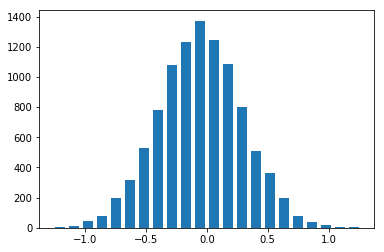

In [103]:
# generate 10 numbers guassian distributed, sigma=1
sigma=0.3450  #standard deviation
np.random.seed(1)
X1=np.random.randn(10000)*sigma
# generate histogram
x_bin=np.arange(-4.0*sigma,3.5*sigma,sigma/3.0)+sigma/2.0
h,b=np.histogram(X1,bins=x_bin)
#print h,b
plt.bar(b[:-1],h,width=sigma/4.0)
plt.show()
#print x_bin

In [104]:
# calculate mean and sigma
print 'Mean=',np.mean(X1)
print 'variance = ',np.std(X1)**2.0
print 'standard deviation = ',np.std(X1)

Mean= 0.00337156656119
variance =  0.118736145554
standard deviation =  0.344581116072


In [105]:
X2=np.random.normal(loc=0.0,scale=0.345,size=100000)  # scale is standard deviation
print 'Mean=',np.mean(X2)
print 'variance = ',np.std(X2)**2.0
print 'standard deviation = ',np.std(X2)
print 'variance = ',np.var(X2)

Mean= 0.00112914225612
variance =  0.11860792853
standard deviation =  0.344395018155
variance =  0.11860792853


### Co-Variance

co-variance = 
[[ 5.11577291  5.14605978]
 [ 5.14605978  6.24250223]]


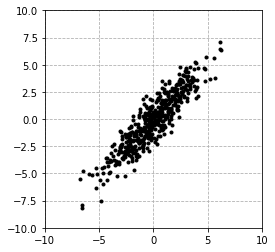

In [106]:
# we first produce some data whose scatter plot lies on a straight line +ve
# y = mx + c or y = x
N=500
y_sigma=1.0
x_sigma=np.sqrt(5.0)
#x = (np.random.rand(N)-0.5)*10
x = np.random.randn(N)*x_sigma
y = np.copy(x)+np.random.randn(N)*y_sigma
print 'co-variance = '
print np.cov(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

co-variance = 
[[ 4.86661582 -4.82600369]
 [-4.82600369  5.74920155]]


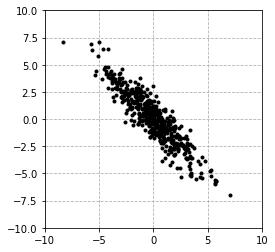

In [108]:
# we first produce some data whose scatter plot lies on a straight line -ve
# y = mx + c or y = -x
N=500
y_sigma=1.0
x_sigma=np.sqrt(5.0)
x = np.random.randn(N)*x_sigma
y = -1*np.copy(x)+np.random.randn(N)*y_sigma
print 'co-variance = '
print np.cov(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

co-variance = 
[[ 5.34834065 -0.07278307]
 [-0.07278307  1.05048647]]


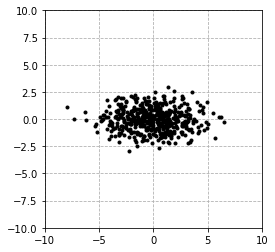

In [109]:
# we first produce some data whose scatter plot lies on a straight line
# y = mx + c or y = -x
N=500
y_sigma=1.0
x_sigma=np.sqrt(5.0)
x = np.random.randn(N)*x_sigma
y = np.random.randn(N)*y_sigma
print 'co-variance = '
print np.cov(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()


co-variance = 
[[ 0.87801123 -0.00704813]
 [-0.00704813  5.62053554]]


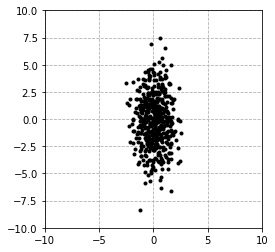

In [110]:
# we first produce some data whose scatter plot lies on a straight line
# y = mx + c or y = -x
N=500
x_sigma=1.0
y_sigma=np.sqrt(5.0)
x = np.random.randn(N)*x_sigma
y = np.random.randn(N)*y_sigma
print 'co-variance = '
print np.cov(x,y) 
#
fig, ax = plt.subplots()
#colors = ['k']*len(x)
ax.plot(x, y,'k.')
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
#ax.grid(b=True, which='major', color='k', linestyle='--')
ax.grid(b=True, which='major', linestyle='--')
#fig.savefig('cov.png', dpi=600)
plt.show()
#plt.close(fig)

## example for covariance on a dataset

## Transformation matrix

In [111]:
#Example
A=np.matrix('3 0,; 8 -1')
y=np.matrix('1 5')
x=np.matrix('1 0')

print 'A=\n',A
print y.shape
print 'y=',y
print 'y\'=',np.transpose(A*np.transpose(y))
print 'x\'=',np.transpose(A*np.transpose(x))
x=np.matrix('1 2')
print 'x\'=',np.transpose(A*np.transpose(x))






A=
[[ 3  0]
 [ 8 -1]]
(1, 2)
y= [[1 5]]
y'= [[3 3]]
x'= [[3 8]]
x'= [[3 6]]


## Eigen Vectors

In [112]:
A=np.matrix('2 3; 2 1')
print A
print 'eigen values = ',np.linalg.eigvals(A)
print 'eigen vectors = '
print np.linalg.eig(A)[1]

[[2 3]
 [2 1]]
eigen values =  [ 4. -1.]
eigen vectors = 
[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]


# PCA

Var(x) =  6.24219107987
Var(y) =  9.03782338582
co-variance = 
[[ 6.25470048  6.22904065]
 [ 6.22904065  9.05593526]]


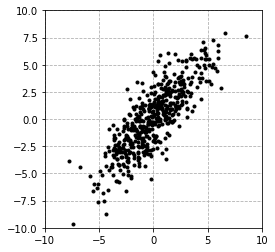

In [113]:
# we first produce some data whose scatter plot lies on a straight line
# y = mx + c or y = x
N=500
y_sigma=1.8
x_sigma=np.sqrt(6.0)
x = np.random.randn(N)*x_sigma
y = np.copy(x)+np.random.randn(N)*y_sigma
print "Var(x) = ",np.var(x)
print "Var(y) = ",np.var(y)
print 'co-variance = '
print np.cov(x,y) 
fig, ax = plt.subplots()
ax.plot(x, y,'k.')
ax.set_xlim((-10,10))
ax.set_ylim((-10,10))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(1.0)
ax.grid(b=True, which='major', linestyle='--')
plt.show()

In [114]:
X=np.zeros([N,2])
X[:,0]=np.copy(x)
X[:,1]=np.copy(y)
print 'shape=',X.shape
XX=np.matrix(X)
np.transpose(XX)*XX/(N-1)

shape= (500, 2)


matrix([[ 6.2549077 ,  6.22720329],
        [ 6.22720329,  9.07222677]])

In [115]:
print XX.shape
XXX=XX.T
print XXX.shape
C=XX.T*XX/(N-1)
C.shape
CC=XXX*XXX.T/(N-1)
print CC.shape
print C
print CC

(500, 2)
(2, 500)
(2, 2)
[[ 6.2549077   6.22720329]
 [ 6.22720329  9.07222677]]
[[ 6.2549077   6.22720329]
 [ 6.22720329  9.07222677]]


# PCA from Richert & Coelho (sklearn)

In [116]:
x1 = np.arange(0,10,.2)
x2 = x1 + np.random.normal(loc=0.0, scale=1.0, size=len(x1))
X=np.c_[(x1,x2)]
good=(x1>5) | (x2>5)  # some arbitrary classes
bad = ~good # to make the example look good

In [117]:
from sklearn import linear_model, decomposition, datasets
pca = decomposition.PCA(n_components=2)

In [118]:
Xtrans = pca.fit_transform(X)
print pca.explained_variance_ratio_
print pca.get_covariance()
print pca.explained_variance_
print pca.components_

[ 0.98279089  0.01720911]
[[ 8.5         8.13446505]
 [ 8.13446505  8.34955737]]
[ 16.55959152   0.28996585]
[[-0.71036851 -0.70382994]
 [ 0.70382994 -0.71036851]]


In [119]:
(8.33+9.24)

17.57

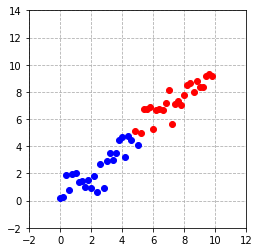

In [120]:
# plot features original
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(X[i,0], X[i,1],c='r',marker='o')
    else:
        ax.plot(X[i,0], X[i,1],c='b',marker='o')
ax.set_xlim((-2,12))
ax.set_ylim((-2,14))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

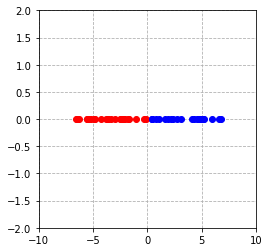

In [121]:
# plot features transformed
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(Xtrans[i,0], 0,c='r',marker='o')
    else:
        ax.plot(Xtrans[i,0], 0,c='b',marker='o')
ax.set_xlim((-10,10))
ax.set_ylim((-2,2))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

# manual pca

1. Let d = feature dimensionality
2. Let N= number of examples in dataset
3. Organise data as a centred matrix X=[N,d], where N=#rows, d=#col [find and subtract the mean]
4. We want to reduce dimensionality to k.
5. After reduction we end up with a dataset X' = [N,k], where k<=p
6. We carry out the following:
7. Compute the covariance matrix M=X'X. This is a [d,d] matrix.
8. Compute the eigenvalues and eigenvectors. ev is a [d,d] matrix
9. Choose the first k largest eigenvalues, i.e [k,d] matrix
10. Project the data onto the eigenvectors, i.e [N,k] matrix

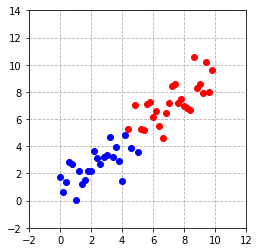

In [122]:
# Generate data set [from Richert & Coelho]
np.random.seed(0)
x1 = np.arange(0,10,.2)
x2 = x1 + np.random.normal(loc=0.0, scale=1.0, size=len(x1))
X=np.matrix(np.c_[(x1,x2)])
good=(x1>5) | (x2>5)  # some arbitrary classes
bad = ~good # to make the example look good
#
#Plot dataset using original (d) features
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(X[i,0], X[i,1],c='r',marker='o')
    else:
        ax.plot(X[i,0], X[i,1],c='b',marker='o')
ax.set_xlim((-2,12))
ax.set_ylim((-2,14))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

shape of datatset matrix =  (50, 2)
N = 50
d = 2
mean_X = [[ 4.9         5.04055927]]
First few examples from dataset:


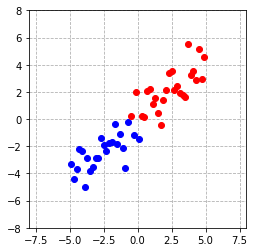

In [123]:
# Organise data as a centred matrix X=[N,p], where N=#rows, p=#col
#
print 'shape of datatset matrix = ',X.shape 
N,d = X.shape
print 'N =',N
print 'd =',d
mean_X = np.mean(X, axis=0)
print 'mean_X =',mean_X
#subtract mean
X = X-mean_X
print 'First few examples from dataset:'
X[0:5,:]
#
#Plot dataset using original (d) centred features
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(X[i,0], X[i,1],c='r',marker='o')
    else:
        ax.plot(X[i,0], X[i,1],c='b',marker='o')
ax.set_xlim((-8,8))
ax.set_ylim((-8,8))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

In [124]:
# Compute the covariance matrix M=X'X. This is a [d,d] matrix.
#
# using built in function:
print np.cov(X.T)
# Using matrix operations
M=(X.T*X)/(N-1)
print M
#compute trace
print 'M trace =',M.trace()

[[ 8.5         7.27563355]
 [ 7.27563355  7.34392205]]
[[ 8.5         7.27563355]
 [ 7.27563355  7.34392205]]
M trace = [[ 15.84392205]]


In [125]:
#we can use single value decomposition to compite eigen values
U,S,V = np.linalg.svd(M)
# U :
# S : Variance
# V : Eigen vectors
print V
print S
print S/np.sum(S)

[[-0.73457438 -0.67852817]
 [-0.67852817  0.73457438]]
[ 15.22052065   0.6234014 ]
[ 0.96065359  0.03934641]


In [126]:
# This is for comparison only
Xtr = pca.fit_transform(X)
print pca.explained_variance_ratio_
print pca.get_covariance()
print pca.explained_variance_
print pca.components_

[ 0.96065359  0.03934641]
[[ 8.5         7.27563355]
 [ 7.27563355  7.34392205]]
[ 15.22052065   0.6234014 ]
[[ 0.73457438  0.67852817]
 [ 0.67852817 -0.73457438]]


In [127]:
# Compute the eigenvalues and eigenvectors. ev is a [d,d] matrix
# e : eigenvalues [d]
# ev : egenvectors [d,d]
e, EV= np.linalg.eigh(M)
# reverse order of arrays, since we want maxium on top
e=e[::-1]
EV=EV[::-1]
print 'Eigenvalues = '
print e
print ' e sum = ',e.sum()
print 'Eigenvectors = '
print EV
# check that eigenvectors are uncorrelated
# dot product is zero
#np.dot(EV[0],EV[1].T)
print EV[0]*EV[1].T

Eigenvalues = 
[ 15.22052065   0.6234014 ]
 e sum =  15.8439220476
Eigenvectors = 
[[-0.73457438 -0.67852817]
 [ 0.67852817 -0.73457438]]
[[ 0.]]


In [128]:
# Choose the first k largest eigenvalues, i.e [k,d] matrix
# we will choose the .......
V=np.copy(EV[0,:])
#print the chosen eigen vector
print V

[[-0.73457438 -0.67852817]]


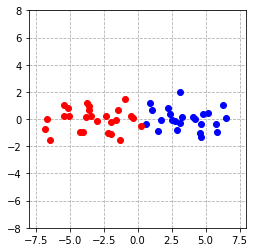

In [136]:
# Project the data onto the eigenvectors, i.e [N,k] matrix
# Xt is data projected on eigenvector
Xt=X.dot(EV.T)

# Plot the projected data rotated towards the direction of maximum variance.
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(Xt[i,0], Xt[i,1],c='r',marker='o')
    else:
        ax.plot(Xt[i,0], Xt[i,1],c='b',marker='o')
ax.set_xlim((-8,8))
ax.set_ylim((-8,8))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()


shape of X_new = (50, 1)


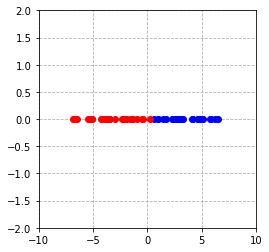

In [138]:
# Project the data onto the eigenvectors, i.e [N,k] matrix
# Xt is data projected on primary eigenvector in order to
# reduce second dimension
Xt=X.dot(V.T)

print 'shape of X_new =',Xt.shape 
# plot features transformed
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(Xt[i,0], 0,c='r',marker='o')
    else:
        ax.plot(Xt[i,0], 0,c='b',marker='o')
#ax.set_xlim((-2,2))
ax.set_xlim((-10,10))
ax.set_ylim((-2,2))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

# PCA from Richert & Coelho (sklearn)

In [139]:
x1 = np.arange(0,10,.2)
x2 = x1 + np.random.normal(loc=0.0, scale=1.0, size=len(x1))
X=np.c_[(x1,x2)]
good=(x1>5) | (x2>5)  # some arbitrary classes
bad = ~good # to make the example look good

In [140]:
from sklearn import linear_model, decomposition, datasets
pca = decomposition.PCA(n_components=2)

In [146]:
Xtrans = pca.fit_transform(X, good)
print Xtrans.shape
print pca.explained_variance_ratio_
print pca.get_covariance()
print pca.explained_variance_
print pca.components_

(50, 2)
[ 0.98588738  0.01411262]
[[  8.5          9.52692984]
 [  9.52692984  11.3210126 ]]
[ 19.54128613   0.27972647]
[[ 0.65327706  0.75711893]
 [ 0.75711893 -0.65327706]]


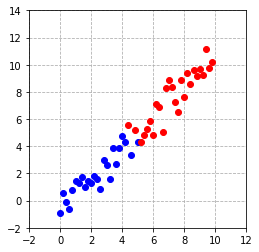

In [144]:
# plot features original
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(X[i,0], X[i,1],c='r',marker='o')
    else:
        ax.plot(X[i,0], X[i,1],c='b',marker='o')
ax.set_xlim((-2,12))
ax.set_ylim((-2,14))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

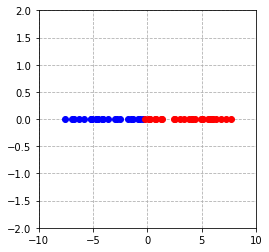

In [145]:
# plot features transformed
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(Xtrans[i,0], 0,c='r',marker='o')
    else:
        ax.plot(Xtrans[i,0], 0,c='b',marker='o')
ax.set_xlim((-10,10))
ax.set_ylim((-2,2))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

# PCA vs LDA

In [171]:
x1 = np.arange(0,10,.2)
x2 = x1 + np.random.normal(loc=0.0, scale=1.0, size=len(x1))
X=np.c_[(x1,x2)]
good=(x1>x2)  # some arbitrary classes
bad = ~good # to make the example look good

In [172]:
from sklearn import linear_model, decomposition, datasets
pca = decomposition.PCA(n_components=2)

In [173]:
Xtrans = pca.fit_transform(X, good)
print pca.explained_variance_ratio_
print pca.get_covariance()
print pca.explained_variance_
print pca.components_
print Xtrans.shape

[ 0.97556038  0.02443962]
[[ 8.5         8.35108622]
 [ 8.35108622  9.07076778]]
[ 17.14134494   0.42942284]
[[-0.69492686 -0.71908043]
 [ 0.71908043 -0.69492686]]
(50, 2)


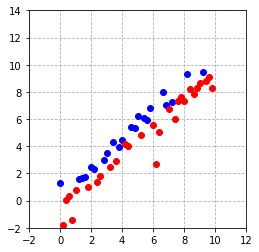

In [174]:
# plot features original
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(X[i,0], X[i,1],c='r',marker='o')
    else:
        ax.plot(X[i,0], X[i,1],c='b',marker='o')
ax.set_xlim((-2,12))
ax.set_ylim((-2,14))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

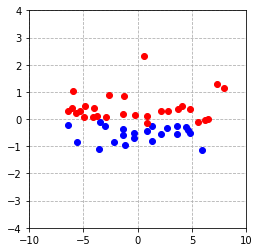

In [176]:
# plot features original
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(Xtrans[i,0], Xtrans[i,1],c='r',marker='o')
    else:
        ax.plot(Xtrans[i,0], Xtrans[i,1],c='b',marker='o')
ax.set_xlim((-10,10))
ax.set_ylim((-4,4))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

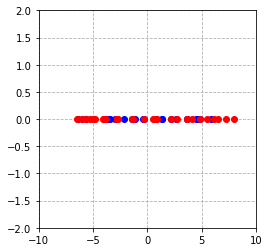

In [177]:
# plot features transformed
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(Xtrans[i,0], 0,c='r',marker='o')
    else:
        ax.plot(Xtrans[i,0], 0,c='b',marker='o')
ax.set_xlim((-10,10))
ax.set_ylim((-2,2))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

In [181]:
from sklearn import discriminant_analysis
lda_t=discriminant_analysis.LinearDiscriminantAnalysis()
Xtrans = lda_t.fit_transform(X, good)
print X.shape
print Xtrans.shape

(50, 2)
(50, 1)


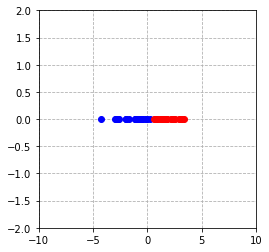

In [155]:
# plot features transformed
fig, ax = plt.subplots()
for i in range(len(good)):
    if good[i]:
        ax.plot(Xtrans[i,0], 0,c='r',marker='o')
    else:
        ax.plot(Xtrans[i,0], 0,c='b',marker='o')
ax.set_xlim((-10,10))
ax.set_ylim((-2,2))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.grid(b=True, which='major', linestyle='--')
plt.show()

# Feature selection (Wrapper) from sklearn

In [156]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


In [161]:
X,y = make_classification(n_samples=100, n_features=10, n_informative=3, random_state=0)
print X[0:5,0:5]
print y

[[ 0.20654985 -1.99440882  0.12454664 -3.24905569  0.65449813]
 [ 0.35924959  0.68839784 -1.72538572  2.30587309  0.20501309]
 [-0.06794353 -2.44499934 -0.34361726 -0.40268287 -1.51501515]
 [-0.51100852  0.51505188 -1.00218322 -0.28045437  0.99274477]
 [ 1.09854667  3.09499716 -0.74226929 -2.09995255 -2.30105665]]
[1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1]


In [158]:
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [165]:
selector=RFE(clf, n_features_to_select=10)
selector=selector.fit(X, y)
#print selector.support_
print selector.ranking_

[1 1 1 1 1 1 1 1 1 1]


In [168]:
selector=RFE(clf, n_features_to_select=1)
selector=selector.fit(X, y)
#print selector.support_
print selector.ranking_
selector=RFE(clf, n_features_to_select=2)
selector=selector.fit(X, y)
#print selector.support_
print selector.ranking_
selector=RFE(clf, n_features_to_select=3)
selector=selector.fit(X, y)
#print selector.support_
print selector.ranking_

[ 7  6  3  4  8  9  2  1 10  5]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
[6 5 2 3 7 8 1 1 9 4]
[5 4 1 2 6 7 1 1 8 3]
